# NGO Trong Nghia

In [1]:
# libraires nécessaires
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0. Résultat de scoring

<b>Variables gardées :</b>
<br>assur_caravane
<br>pouvoir_achat
<br>niv_etud_bas
<br>locataire
<br>proprietaire
<br><b>Variables modifiées faciles :</b>
<br>nbmaisons
<br>nbpers_au_foyer
<br>mt_auto
<br>nb_auto
<br>nb_incendie
<br>niv_etude_haut
<br>revenu_moyen
<br>nb_RC
<br>auto0
<br>auto1
<br>revenu1
<br>revenu2
<br>revenu3
<br>revenu4
<br>marie
<br>autre_relation
<br><b>Variables modifiées difficiles :</b>
<br>type_client
<br>mt_incendie
<br>mt_RC
<br>assur_sante_prive
<br>assur_sante_public
<br><b>Variables enlèvées :</b>
<br>mt_RC_entreprise
<br>nb_RC_entreprise
<br>mt_camion_livraison
<br>nb_camion_livraison
<br>nb_remorque
<br>mt_remorque

# 1. Relire données

In [2]:
data_train = pd.read_table('train_set.csv',sep=',',header=0,index_col=0)
data_test = pd.read_table('val_set.csv',sep=',',header=0,index_col=0)
data_train.head(10)

,assur_caravane,nbmaisons,pouvoir_achat,nbpers_au_foyer,type_client,mt_auto,nb_auto,mt_incendie,nb_incendie,niv_etud_bas,...,marie,autre_relation,assur_sante_prive,assur_sante_public,mt_RC_entreprise,nb_RC_entreprise,mt_camion_livraison,nb_camion_livraison,nb_remorque,mt_remorque
cle,,,,,,,,,,,,,,,,,,,,,
5797,0,1,5,4,9,5,1,0,0,8,...,7,2,0,9,0,0,0,0,0,0
697,0,3,6,2,1,6,1,0,0,2,...,7,2,4,5,0,0,0,0,0,0
3853,0,1,5,1,8,0,0,0,0,0,...,6,3,5,4,0,0,0,0,0,0
4054,1,2,8,4,2,6,1,4,1,1,...,9,0,6,3,0,0,0,0,0,0
3765,0,1,3,2,8,6,1,0,0,4,...,7,2,3,6,0,0,0,0,0,0
5207,0,1,4,3,10,0,0,0,0,6,...,6,3,3,6,0,0,0,0,0,0
5015,1,1,8,4,1,6,1,4,1,1,...,8,1,7,2,0,0,0,0,0,0
4221,0,1,3,2,5,5,1,2,1,5,...,4,4,1,8,0,0,0,0,0,0
1857,0,1,7,3,3,0,0,0,0,4,...,5,5,5,5,0,0,0,0,0,0


In [3]:
data_test.head(10)

,assur_caravane,nbmaisons,pouvoir_achat,nbpers_au_foyer,type_client,mt_auto,nb_auto,mt_incendie,nb_incendie,niv_etud_bas,...,marie,autre_relation,assur_sante_prive,assur_sante_public,mt_RC_entreprise,nb_RC_entreprise,mt_camion_livraison,nb_camion_livraison,nb_remorque,mt_remorque
cle,,,,,,,,,,,,,,,,,,,,,
3657,0,1,4,3,9,6,1,0,0,7,...,5,2,2,7,0,0,0,0,0,0
4252,1,1,5,4,9,0,0,3,1,7,...,7,2,0,9,0,0,0,0,0,0
3951,1,2,8,3,3,0,0,0,0,3,...,6,2,3,6,0,0,0,0,0,0
177,0,1,4,3,3,0,0,3,1,3,...,7,2,5,4,0,0,0,0,0,0
5218,0,1,3,2,5,0,0,0,0,3,...,4,3,2,7,0,0,0,0,0,0
2600,0,1,4,4,3,6,1,3,1,3,...,7,2,3,6,0,0,0,0,0,0
3686,0,1,8,3,1,0,0,4,1,0,...,9,0,6,3,0,0,0,0,0,0
2528,0,1,8,3,3,6,1,0,0,2,...,7,0,4,5,0,0,0,0,0,0
5441,1,1,6,2,1,6,1,2,1,3,...,5,3,4,5,0,0,0,0,0,0


# 2. Raisonner des variables modifiées difficiles

## Variable type_client

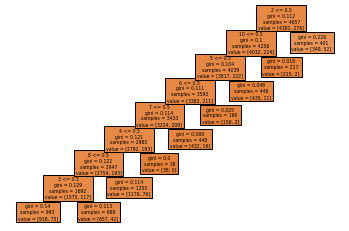

8     1255
3      699
9      535
1      458
7      448
5      446
2      401
10     217
6      160
4       38
Name: type_client, dtype: int64
DecisionTreeClassifier(max_depth=8, min_samples_leaf=20)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree
X = pd.get_dummies(data_train['type_client'],drop_first = True)
arbre_cla=DecisionTreeClassifier(max_depth=8,min_samples_leaf=20)
#
arbre_cla.fit(X,data_train['assur_caravane'])
plot_tree(arbre_cla, filled=True,feature_names=X.columns)
plt.show()
print(data_train['type_client'].value_counts())
print(arbre_cla)

Groupe 4 dans 3. Groupe 6 dans 7.

## Variable mt_incendie

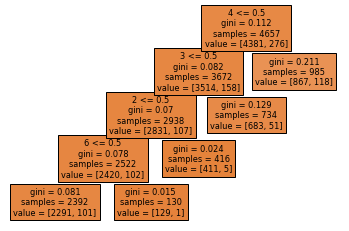

0    2142
4     985
3     734
2     416
6     130
1     128
5     114
7       7
8       1
Name: mt_incendie, dtype: int64
DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)


In [5]:
X = pd.get_dummies(data_train['mt_incendie'],drop_first = True)
arbre_cla=DecisionTreeClassifier(max_depth=4,min_samples_leaf=20)
#
arbre_cla.fit(X,data_train['assur_caravane'])
plot_tree(arbre_cla, filled=True,feature_names=X.columns)
plt.show()
print(data_train['mt_incendie'].value_counts())
print(arbre_cla)

On met 6,7,8 dans 5 (résultat observé de scoring). On ne sais pas décider avec le groupe 1.
Avec l'aide d'arbre de décision en haut, on va mettre group 1 dans 0.

## Variable mt_RC

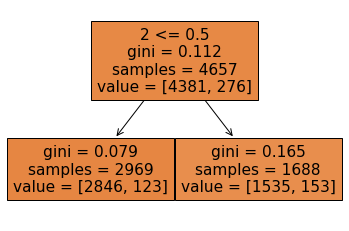

0    2807
2    1688
1     153
3       9
Name: mt_RC, dtype: int64
DecisionTreeClassifier(max_depth=1, min_samples_leaf=20)


In [6]:
X = pd.get_dummies(data_train['mt_RC'],drop_first = True)
arbre_cla=DecisionTreeClassifier(max_depth=1,min_samples_leaf=20)
#
arbre_cla.fit(X,data_train['assur_caravane'])
plot_tree(arbre_cla, filled=True,feature_names=X.columns)
plt.show()
print(data_train['mt_RC'].value_counts())
print(arbre_cla)

On met groupe 3 dans groupes 2 (résultat observé de scoring). On ne sais pas décider avec le groupe 1. Avec l'aide d'arbre de décision en haut, on va mettre group 1 dans 0.

## Variable assur_sante_prive

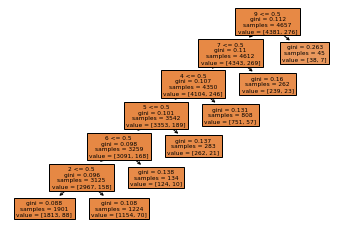

2    1224
4     808
3     671
0     670
1     549
5     283
7     262
6     134
9      45
8      11
Name: assur_sante_prive, dtype: int64
DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)


In [7]:
X = pd.get_dummies(data_train['assur_sante_prive'],drop_first = True)
arbre_cla=DecisionTreeClassifier(max_depth=6,min_samples_leaf=20)
#
arbre_cla.fit(X,data_train['assur_caravane'])
plot_tree(arbre_cla, filled=True,feature_names=X.columns)
plt.show()
print(data_train['assur_sante_prive'].value_counts())
print(arbre_cla)

On met groupe 8, 9 dans groupes 7 (résultat observé de scoring). On ne sais pas décider avec le groupe 6. Avec l'aide d'arbre de décision en haut, on va mettre groupe 6 dans 7.

## Variable assur_sante_public

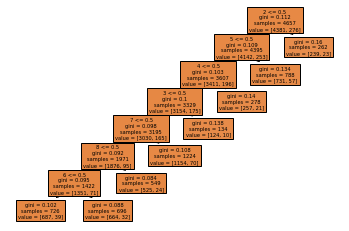

7    1224
5     788
6     696
9     670
8     549
4     278
2     262
3     134
0      45
1      11
Name: assur_sante_public, dtype: int64
DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)


In [8]:
X = pd.get_dummies(data_train['assur_sante_public'],drop_first = True)
arbre_cla=DecisionTreeClassifier(max_depth=7,min_samples_leaf=20)
#
arbre_cla.fit(X,data_train['assur_caravane'])
plot_tree(arbre_cla, filled=True,feature_names=X.columns)
plt.show()
print(data_train['assur_sante_public'].value_counts())
print(arbre_cla)

On met groupe 0, 1 dans groupes 2 (résultat observé de scoring). On ne sais pas décider avec le groupe 3 (en 2 ou 4). Avec l'aide d'arbre de décision en haut, on va mettre groupe 3 dans 4.

# 3. Fonctions de discretisation

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz, plot_tree

def discretisation(df_entree):
    df = df_entree.copy()
    # Cas variables gardées : On ne rien faire
    
    # Cas Variables enlèvées : mt_RC_entreprise, nb_RC_entreprise, mt_camion_livraison,
    # nb_camion_livraison, nb_remorque, mt_remorque
    df.drop(columns =['mt_RC_entreprise', 'nb_RC_entreprise', 'mt_camion_livraison',
                       'nb_camion_livraison', 'nb_remorque', 'mt_remorque'], inplace=True, axis = 1)
    
    # Cas Variables modifiées faciles
    ## nbmaisons : groupe 1 et les autres dans group 2.
    #df.loc[df['nbmaisons'] > 1,'nbmaisons']='2et+'
    df['nbmaisons'][df['nbmaisons'] > 1] = '2et+'
    ## nbpers_au_foyer : groupe 1, groupe 2, groupe 3 et 5 dans group 4.
    df.loc[(df['nbpers_au_foyer'] == 5) | (df['nbpers_au_foyer'] == 4),'nbpers_au_foyer']='4+5'
    #df['nbpers_au_foyer'][(df['nbpers_au_foyer'] == 5) | (df['nbpers_au_foyer'] == 4)] = '4+5'
    ## mt_auto : On met 4 dans groupe 5 et 7,8 dans groupe 6.
    #df['mt_auto'][(df['mt_auto'] > 3) & (df['mt_auto'] < 6)] = '4+5'
    df.loc[(df['mt_auto'] > 3) & (df['mt_auto'] < 6),'mt_auto'] = '4+5'
    #df['mt_auto'][df['mt_auto'] == 6] = '6et+'
    df.loc[(df['mt_auto'] == 6) | (df['mt_auto'] == 7) | (df['mt_auto'] == 8),'mt_auto'] = '6et+'

    ## nb_auto : Groupe 0, group 1 et les autres dans groupe 2.
    df.loc[df['nb_auto'] > 1,'nb_auto'] = '2et+'
    ## nb_incendie : group 0 et les autres dans group 1.
    df.loc[df['nb_incendie'] > 0,'nb_incendie'] = '1et+'
    ## niv_etude_haut : groupe 0,1,2,3,4 et les autres dans groupe 5.
    df.loc[df['niv_etude_haut'] > 4,'niv_etude_haut'] = '5et+'
    ## revenu_moyen : 0, 1 dans groupe 2, groupe 3, groupe 4, groupe 5 et 7,8,9 dans groupe 6.
    df.loc[df['revenu_moyen'] < 3,'revenu_moyen'] = '2et-'
    df.loc[df['revenu_moyen'] == 6,'revenu_moyen'] = '6et+'
    df.loc[df['revenu_moyen'] == 7,'revenu_moyen'] = '6et+'
    df.loc[df['revenu_moyen'] == 8,'revenu_moyen'] = '6et+'
    df.loc[df['revenu_moyen'] == 9,'revenu_moyen'] = '6et+'
    ## nb_RC : Groupe 0 et 2 dans groupe 1.
    df.loc[df['nb_RC'] > 0,'nb_RC'] = '1et+'
    ## auto0 : Groupe 0, groupe 1, groupe 2, groupe 3, groupe 4 et 6,7,8,9 dans groupe 5.
    df.loc[df['auto0'] > 4,'auto0'] = '5et+'
    ## auto1 : 0,1,2 dans groupe 3, group 4, groupe 5, groupe 6, groupe 7, group 8, groupe 9
    df.loc[df['auto1'] < 4,'auto1'] = '3et-'
    ## revenu1 : groupe 0, group 1, groupe 2, groupe 3, groupe 4, group 5, et 7,8,9 dans groupe 6.
    df.loc[df['revenu1'] > 5,'revenu1'] = '6et+'
    ## revenu2 : groupe 0, group 1, groupe 2, groupe 3, groupe 4, group 5, groupe 6 et 8,9 dans groupe 7.
    df.loc[df['revenu2'] > 6,'revenu2'] = '7et+'
    ## revenu3 : Groupe 0, group 1, groupe 2, groupe 3, groupe 4, group 5 et 7,8,9 dans groupe 6.
    df.loc[df['revenu3'] > 5,'revenu3'] = '6et+'
    ## revenu4 : Groupe 0, group 1, groupe 2 et 4,5,6,7,8,9 dans groupe 3.
    df.loc[df['revenu4'] > 2,'revenu4'] = '3et+'
    ## marie : 0,1,2 dans groupe 3 et groupe 4, group 5, groupe 6, groupe 7, groupe 8, group 9.
    df.loc[df['marie'] < 4,'marie'] = '3et-'
    ## autre_relation : Groupe 0, group 1, groupe 2, groupe 3, groupe 4, groupe 5 et 7,8,9 dans groupe 6.
    df.loc[df['autre_relation'] > 5,'autre_relation'] = '6et+'

    # Cas variables modifiées difficiles :
    #### méthode supervisée : arbres de décision
    ## type_client : Groupe 4 dans 3. Groupe 6 dans 7.
    df.loc[(df['type_client'] == 3) | (df['type_client'] == 4),'type_client'] = '3+4'
    df.loc[df['type_client'] == 6 ,'type_client'] = '6+7'
    df.loc[df['type_client'] == 7 ,'type_client'] = '6+7'
    
    ## mt_incendie : On met 6,7,8 dans 5. 
    ## On ne sais pas décider avec le groupe 1.
    ## Avec l'aide d'arbre de décision en haut, on va mettre group 1 dans 0.
    df.loc[df['mt_incendie'] > 4,'mt_incendie'] = '5et+'
    df.loc[df['mt_incendie'] == 0,'mt_incendie'] = '1et-'   
    df.loc[df['mt_incendie'] == 1,'mt_incendie'] = '1et-'   
    
    ## mt_RC : On met groupe 3 dans groupes 2. 
    ## On ne sais pas décider avec le groupe 1.
    ## Avec l'aide d'arbre de décision en haut, on va mettre group 1 dans 0.
    df.loc[df['mt_RC'] > 3,'mt_RC'] = '2+3'
    df.loc[df['mt_RC'] ==0,'mt_RC'] = '0+1'
    df.loc[df['mt_RC'] ==1,'mt_RC'] = '0+1' 
    
    ## assur_sante_prive : On met groupe 8, 9 dans groupes 7.
    ## On ne sais pas décider avec le groupe 6. 
    ## Avec l'aide d'arbre de décision en haut, on va mettre groupe 6 dans 7.
    df.loc[df['assur_sante_prive'] > 5,'assur_sante_prive'] = '6et+' 
    
    ## assur_sante_public : On met groupe 0, 1 dans groupes 2. 
    ## On ne sais pas décider avec le groupe 3 (en 2 ou 4). 
    ## Avec l'aide d'arbre de décision en haut, on va mettre groupe 3 dans 4.
    df.loc[df['assur_sante_public'] < 3,'assur_sante_public'] = '2et-'
    df.loc[df['assur_sante_public'] ==3,'assur_sante_public'] = '3+4'
    df.loc[df['assur_sante_public'] ==4,'assur_sante_public'] = '3+4'
    
    return df

In [10]:
data_clean_train = discretisation(data_train)

In [11]:
data_clean_train

,assur_caravane,nbmaisons,pouvoir_achat,nbpers_au_foyer,type_client,mt_auto,nb_auto,mt_incendie,nb_incendie,niv_etud_bas,...,auto0,auto1,revenu1,revenu2,revenu3,revenu4,marie,autre_relation,assur_sante_prive,assur_sante_public
cle,,,,,,,,,,,,,,,,,,,,,
5797,0,1,5,4+5,9,4+5,1,1et-,0,8,...,2,6,2,6,2,0,7,2,0,9
697,0,2et+,6,2,1,6et+,1,1et-,0,2,...,2,7,1,1,6et+,0,7,2,4,5
3853,0,1,5,1,8,0,0,1et-,0,0,...,3,6,6et+,0,3,0,6,3,5,3+4
4054,1,2et+,8,4+5,2,6et+,1,4,1et+,1,...,0,8,0,3,5,2,9,0,6et+,3+4
3765,0,1,3,2,8,6et+,1,1et-,0,4,...,2,6,2,5,3,0,7,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,0,1,1,2,6+7,6et+,1,1et-,0,6,...,4,5,6et+,3,0,0,4,3,1,8
2418,0,1,7,3,2,6et+,1,1et-,0,2,...,0,7,0,2,6et+,2,7,0,6et+,2et-
4621,0,1,3,3,10,6et+,2et+,5et+,1et+,2,...,0,4,0,4,4,2,6,0,6et+,3+4


In [12]:
data_clean_test = discretisation(data_test)

In [13]:
data_clean_test

,assur_caravane,nbmaisons,pouvoir_achat,nbpers_au_foyer,type_client,mt_auto,nb_auto,mt_incendie,nb_incendie,niv_etud_bas,...,auto0,auto1,revenu1,revenu2,revenu3,revenu4,marie,autre_relation,assur_sante_prive,assur_sante_public
cle,,,,,,,,,,,,,,,,,,,,,
3657,0,1,4,3,9,6et+,1,1et-,0,7,...,0,9,0,7et+,0,0,5,2,2,7
4252,1,1,5,4+5,9,0,0,3,1et+,7,...,2,6,1,7et+,2,0,7,2,0,9
3951,1,2et+,8,3,3+4,0,0,1et-,0,3,...,2,6,2,3,4,2,6,2,3,6
177,0,1,4,3,3+4,0,0,3,1et+,3,...,4,5,1,3,5,1,7,2,5,3+4
5218,0,1,3,2,5,0,0,1et-,0,3,...,4,5,4,4,1,1,4,3,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,0,1,7,3,3+4,0,0,1et-,0,0,...,0,9,0,4,3,2,9,0,5,3+4
1221,0,1,3,2,8,6et+,1,1et-,0,4,...,4,5,1,4,0,3et+,9,0,0,9
3026,0,1,1,2,6+7,0,0,1et-,0,4,...,3,6,5,3,2,0,3et-,5,1,8
